# Model Evaluation

## 어떤 모델이 좋은 모델인가?

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import numpy as np

In [3]:
from IPython.display import Image
width=800; height=500
dir_path = r'D:\ASSIST\img\aSSIST_20220111_1학기_조상구'

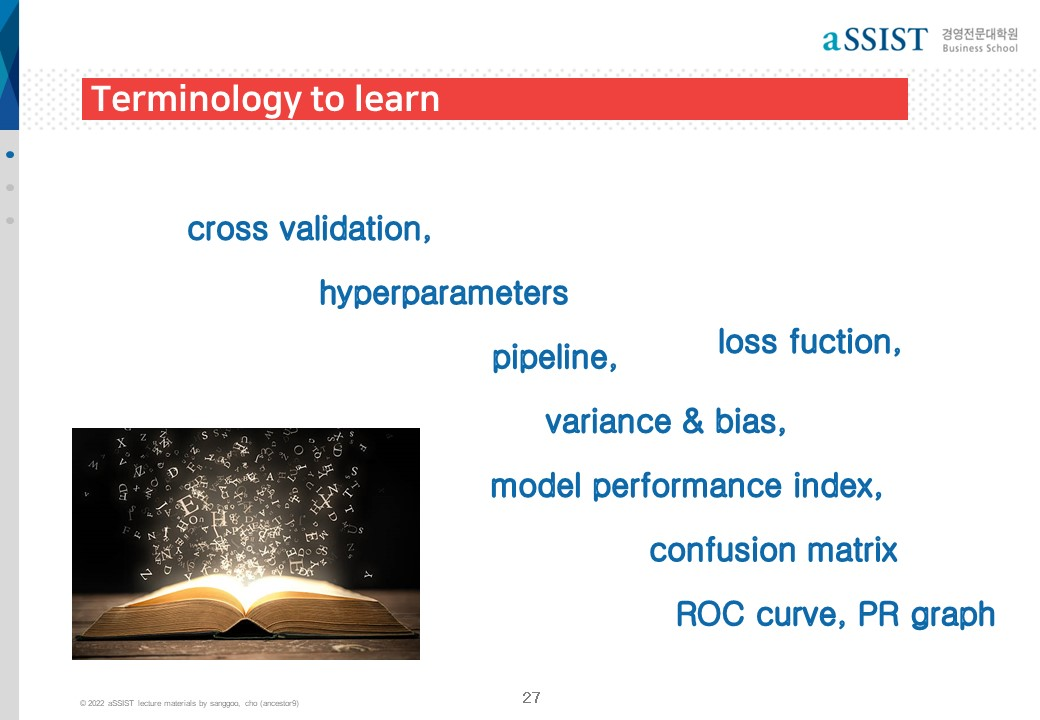

In [4]:
Image(filename=dir_path + '/슬라이드27.jpg', width=width, height=height)

## Confusion matrix with recall & precision

In [6]:
y_true = ['pos', 'pos','pos','pos','pos','pos','pos','pos','pos','pos','pos','pos',
         'neg', 'neg','neg','neg','neg','neg','neg','neg','neg','neg']
y_pred = ['pos', 'pos','pos','pos','pos','neg','neg','neg','neg','neg','neg','neg',
         'neg', 'neg','neg','neg','neg','neg','neg','pos','pos','pos']

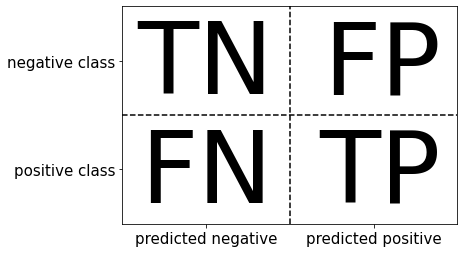

In [4]:
import mglearn
mglearn.plots.plot_binary_confusion_matrix()

In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[7, 3],
       [7, 5]], dtype=int64)

<AxesSubplot:>

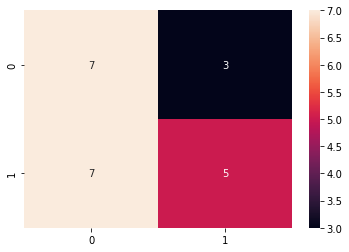

In [8]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)

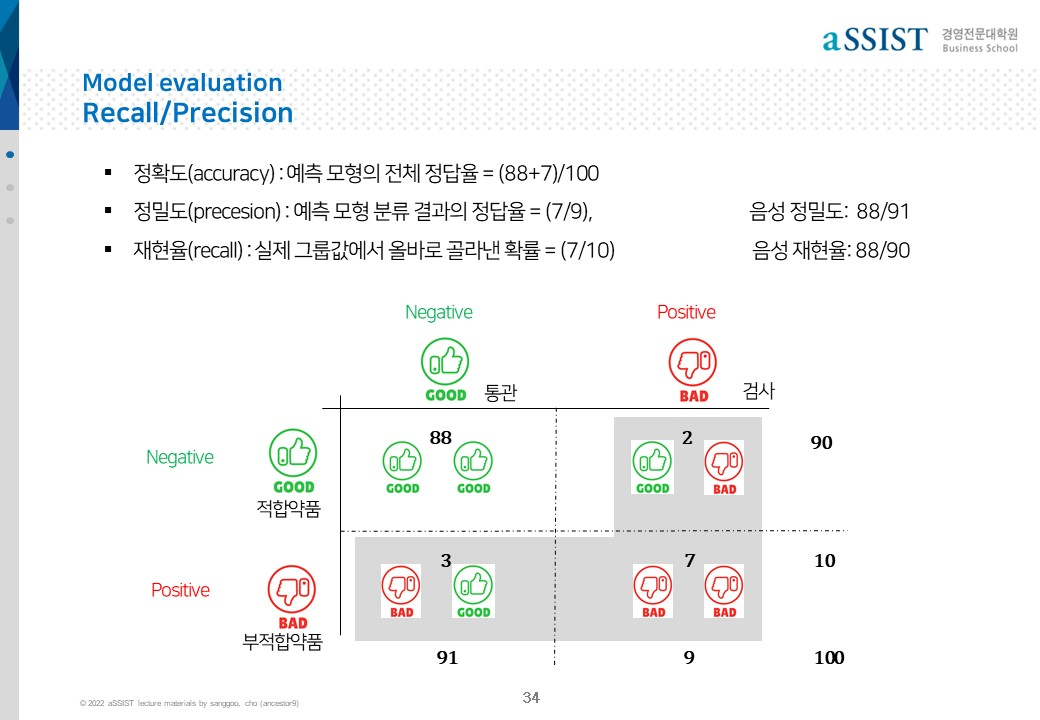

In [5]:
Image(filename=dir_path + '/슬라이드34.jpg', width=width, height=height)

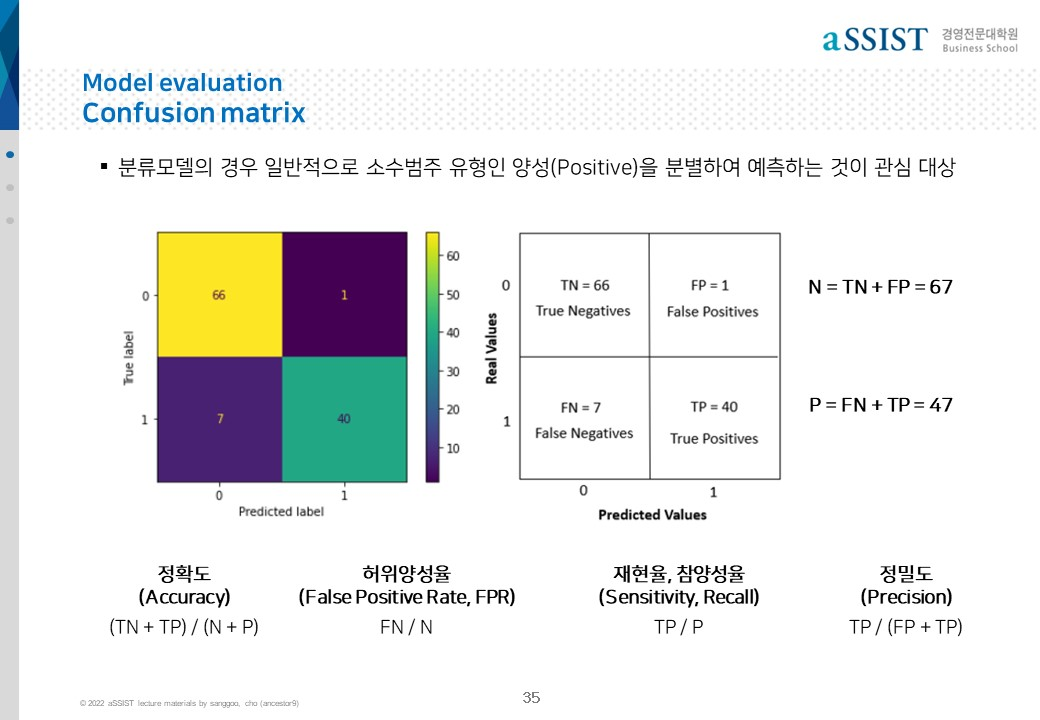

In [10]:
Image(filename=dir_path + '/슬라이드35.jpg', width=width, height=height)

In [9]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

(7, 3, 7, 5)

https://en.wikipedia.org/wiki/Precision_and_recall
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' height=300 width=300>

In [12]:
from sklearn.metrics import classification_report
target_names = ['class 0(negative)', 'class 1(positive)']
print(classification_report(y_true, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

class 0(negative)       0.50      0.70      0.58        10
class 1(positive)       0.62      0.42      0.50        12

         accuracy                           0.55        22
        macro avg       0.56      0.56      0.54        22
     weighted avg       0.57      0.55      0.54        22



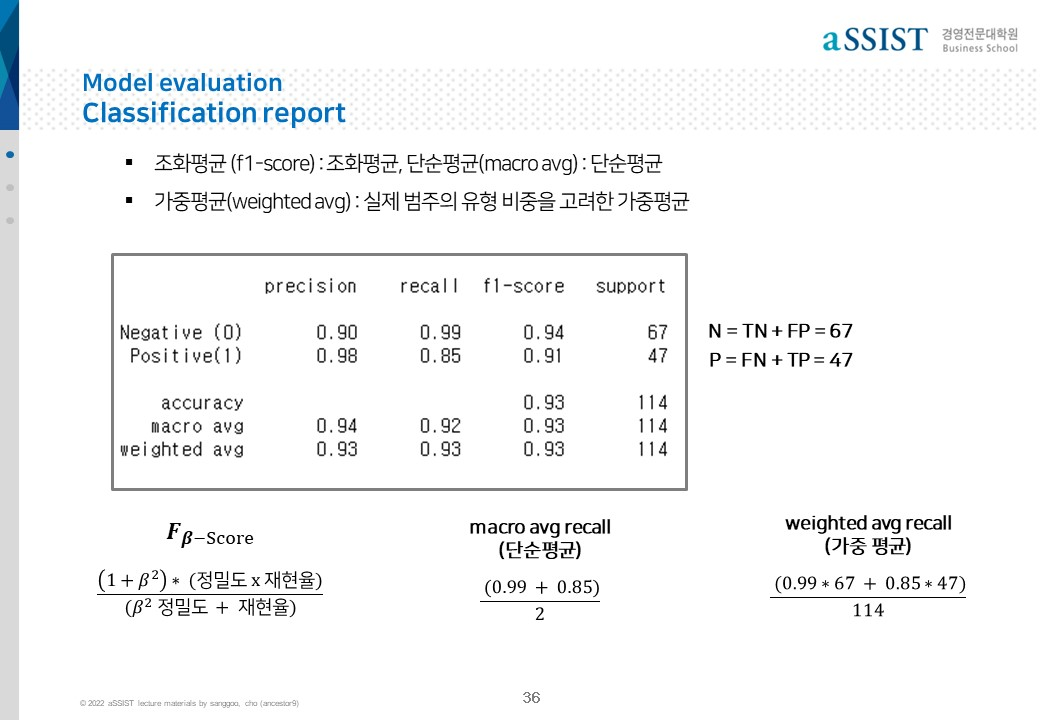

In [13]:
Image(filename=dir_path + '/슬라이드36.jpg', width=width, height=height)

## Import the dataset Wisconsin breast cancer dataset from skelarn.

In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer = pd.DataFrame(np.c_[cancer['target'], cancer['data']], 
                      columns = np.append('target', cancer['feature_names']))
cancer['target'] = cancer['target'].map({0.0: 1, 1.0:0}).astype('int64')
cancer.shape
cancer.head()
cancer.target.value_counts(normalize=True) #cancer.target.value_counts().plot(kind='bar', rot='360')

(569, 31)

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


0    0.627417
1    0.372583
Name: target, dtype: float64

#### 층화 추출

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [16]:
# Separate the independent variables from the dependent variable.
X = cancer.drop('target', axis = 1)
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
clf = SVC(random_state=0, probability=True)
clf.fit(X_train, y_train)

SVC(probability=True, random_state=0)

## confusion_matrix

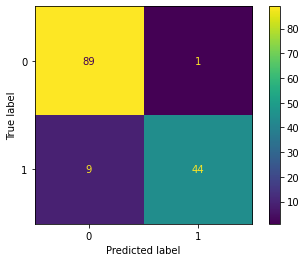

array([[89,  1],
       [ 9, 44]], dtype=int64)

<AxesSubplot:>

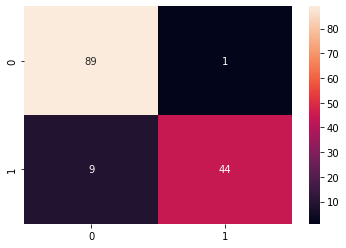

In [17]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
plot_confusion_matrix(clf, X_test, y_test);plt.show()
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt="d")

### manual calculation

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[89,  1],
       [ 9, 44]], dtype=int64)

In [21]:
print(f'정확도(accuracy): {(cm * np.eye(2)).sum() / cm.sum():.3f}')
print(f'정밀도(precision): {((cm * np.eye(2)).sum(axis=0) / cm.sum(axis=0)).round(3)}')
precision = (cm * np.eye(2)).sum(axis=0) / cm.sum(axis=0)
print(f'검측율(recall): {((cm * np.eye(2)).sum(axis=1) / cm.sum(axis=1)).round(3)}')
recall = (cm * np.eye(2)).sum(axis=1) / cm.sum(axis=1)
print(f'f1-score(Harmonic mean): {((2 / (1 / precision + 1 / recall))).round(3)}')

정확도(accuracy): 0.930
정밀도(precision): [0.908 0.978]
검측율(recall): [0.989 0.83 ]
f1-score(Harmonic mean): [0.947 0.898]


### classification_report

In [18]:
from sklearn.metrics import classification_report
target_names = ['생존(0)', '사망(1)']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       생존(0)       0.91      0.99      0.95        90
       사망(1)       0.98      0.83      0.90        53

    accuracy                           0.93       143
   macro avg       0.94      0.91      0.92       143
weighted avg       0.93      0.93      0.93       143



### 예측 모형의 성능지표 이해하기

- **허위** 음성과 **허위** 양성은 **잘못** 분류
- **실제** 음성과 **실제** 양성은 **올바로** 분류
- **정확도**는 올바로 분류된 비율

> $\frac{\text{true samples}}{\text{total samples}}$

- **정밀도**는 올바르게 분류된 **예측** 양성의 비율

> $\frac{\text{true positives}}{\text{true positives + false positives}}$

- **재현율**은 올바르게 분류된 **실제** 양성의 비율

> $\frac{\text{true positives}}{\text{true positives + false negatives}}$

### ROC(Receiver Operating Characteristic Curve) & AUROC(Area Under the Receiver Operating Characteristic Curve)

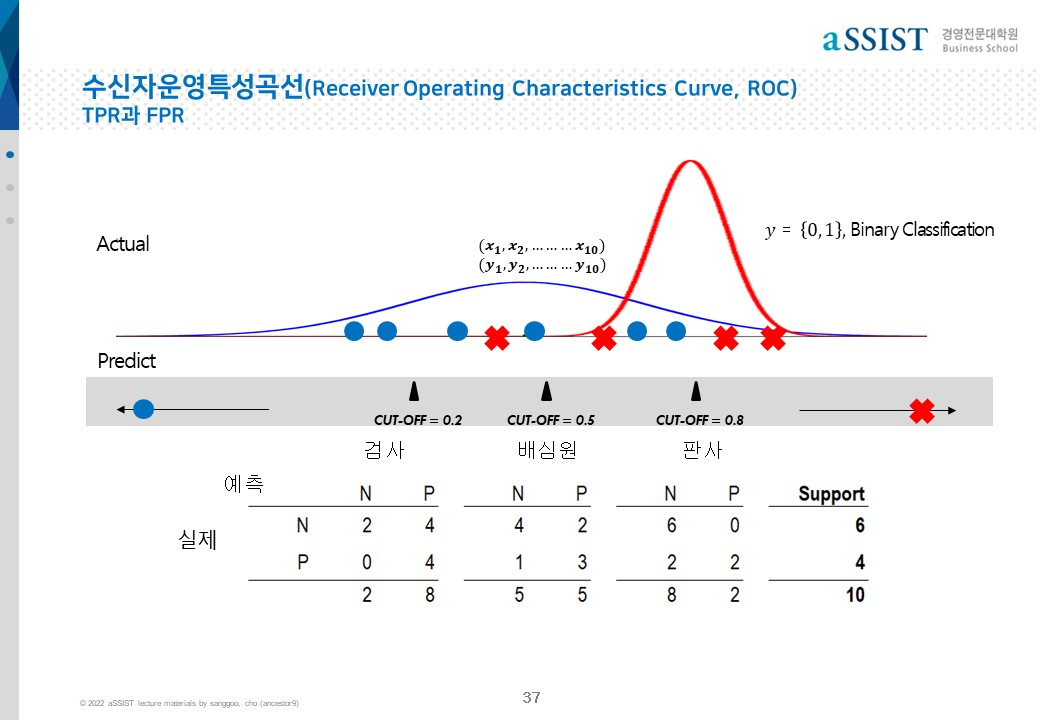

In [20]:
Image(filename=dir_path + '/슬라이드37.jpg', width=width, height=height)

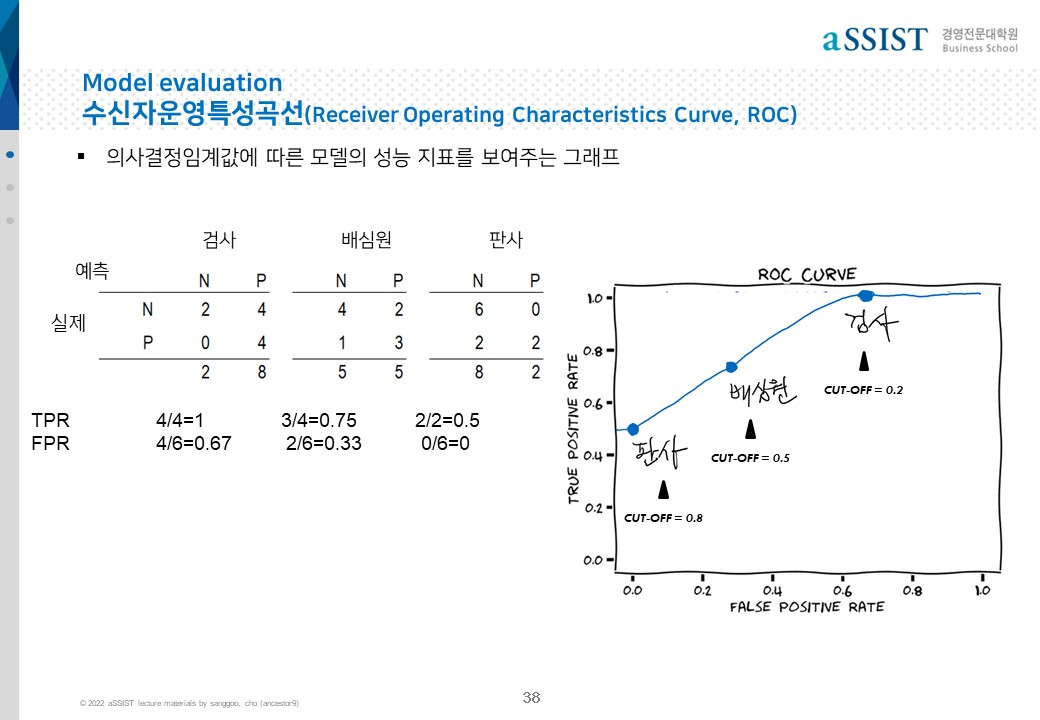

In [23]:
Image(filename=dir_path + '/슬라이드38.jpg', width=width, height=height)

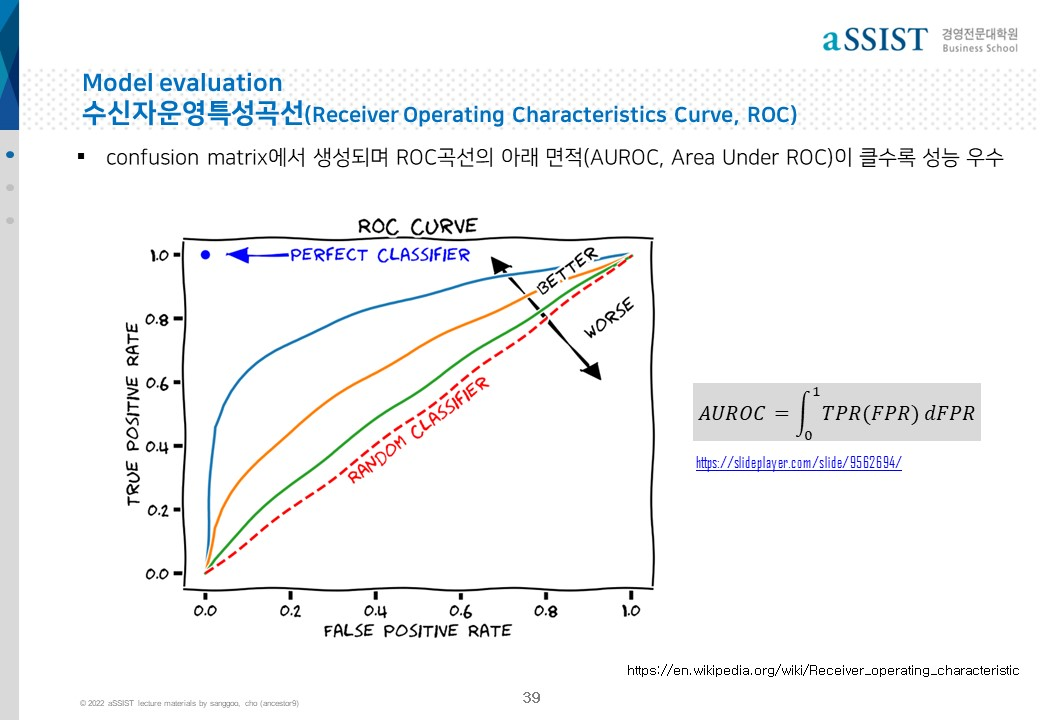

In [24]:
Image(filename=dir_path + '/슬라이드39.jpg', width=width, height=height)

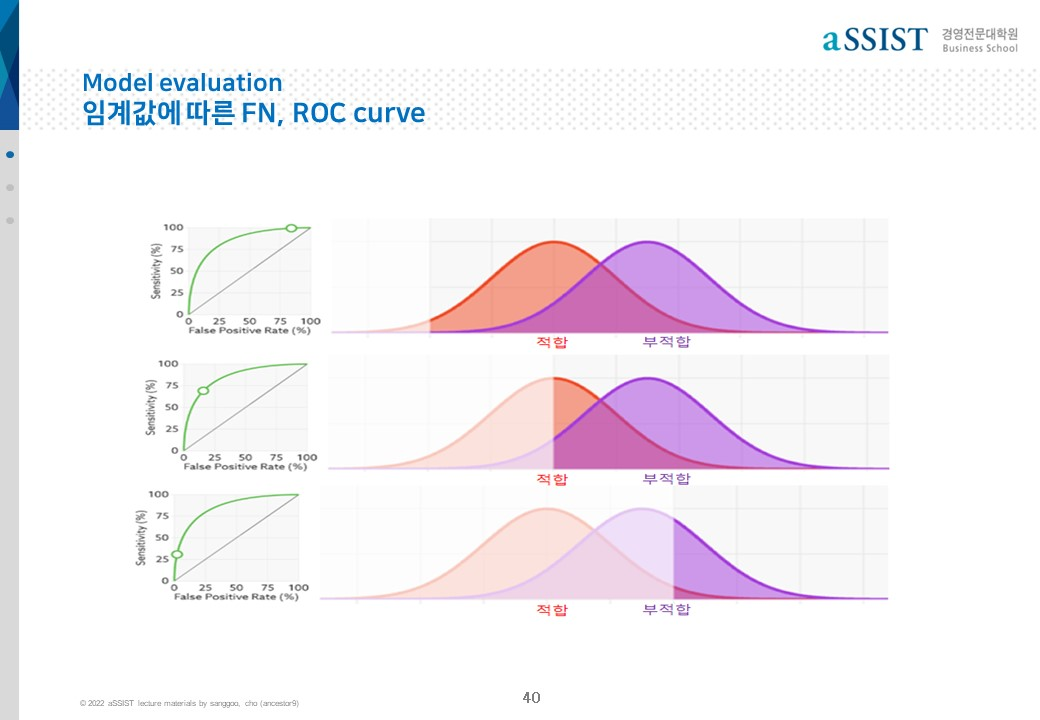

In [25]:
Image(filename=dir_path + '/슬라이드40.jpg', width=width, height=height)

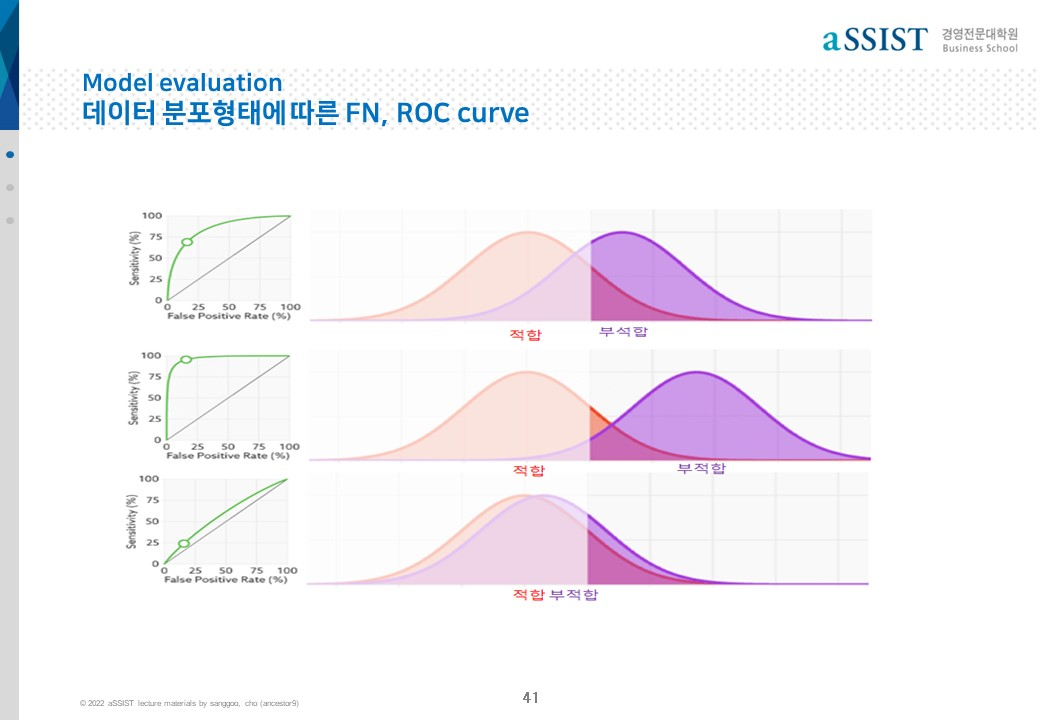

In [38]:
Image(filename=dir_path + '/슬라이드41.jpg', width=width, height=height)

## Threshold value에 따른 변화
<img src='https://www.jeremyjordan.me/content/images/2018/11/roc_cutoff-1.gif'>

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

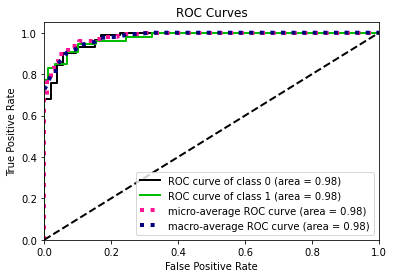

In [36]:
import scikitplot as skplt 
skplt.metrics.plot_roc(y_test, y_probas)

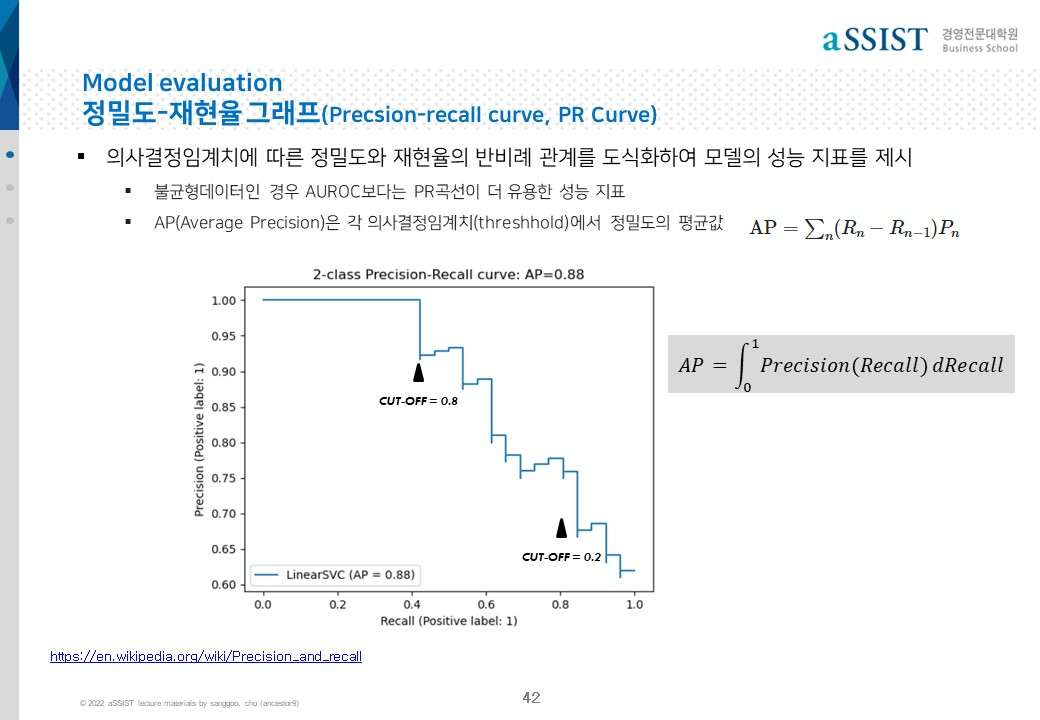

In [39]:
Image(filename=dir_path + '/슬라이드42.jpg', width=width, height=height)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

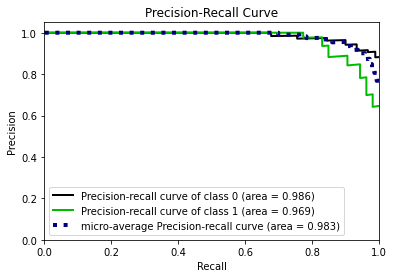

In [40]:
skplt.metrics.plot_precision_recall(y_test, y_probas)

In [41]:
from sklearn.metrics import precision_recall_curve

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probas[:, 1])
scores = [np.sum(to_labels(y_probas[:, 1], t))/len(y_probas[:, 1]) for t in thresholds]

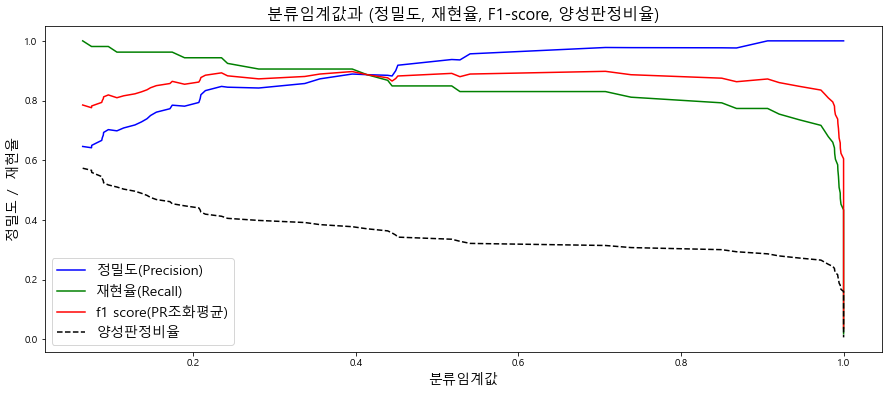

In [42]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.rcParams["figure.figsize"] = (15,6)
    plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
    plt.title('분류임계값과 (정밀도, 재현율, F1-score, 양성판정비율)', fontsize='16') 
    plt.plot(thresholds, precisions[:-1], 'b-', label='정밀도(Precision)') # 판사
    plt.plot(thresholds, recalls[:-1], 'g-', label='재현율(Recall)') # 검사
    plt.plot(thresholds, (2*precisions[:-1]*recalls[:-1])/(precisions[:-1] +recalls[:-1]), 
             'r-', label='f1 score(PR조화평균)') # 변호사
    plt.plot(thresholds, scores, 'k--', label='양성판정비율') # q-ratio
    plt.ylabel('정밀도 /  재현율', fontsize='14') 
    plt.xlabel('분류임계값', fontsize='14') 
    plt.legend(loc='best', fontsize='14') 
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

## f1-score가 최대인 threshold?

In [43]:
from sklearn.metrics import f1_score
scores = [f1_score(y_test, to_labels(y_probas[:, 1], t)) for t in thresholds]
ix = np.argmax(scores)
print(f'Threshold(분류임계값)={thresholds[ix]:.3f}, at Maximum F-measure={scores[ix]:.3f}')

Threshold(분류임계값)=0.707, at Maximum F-measure=0.898


## Brier_score

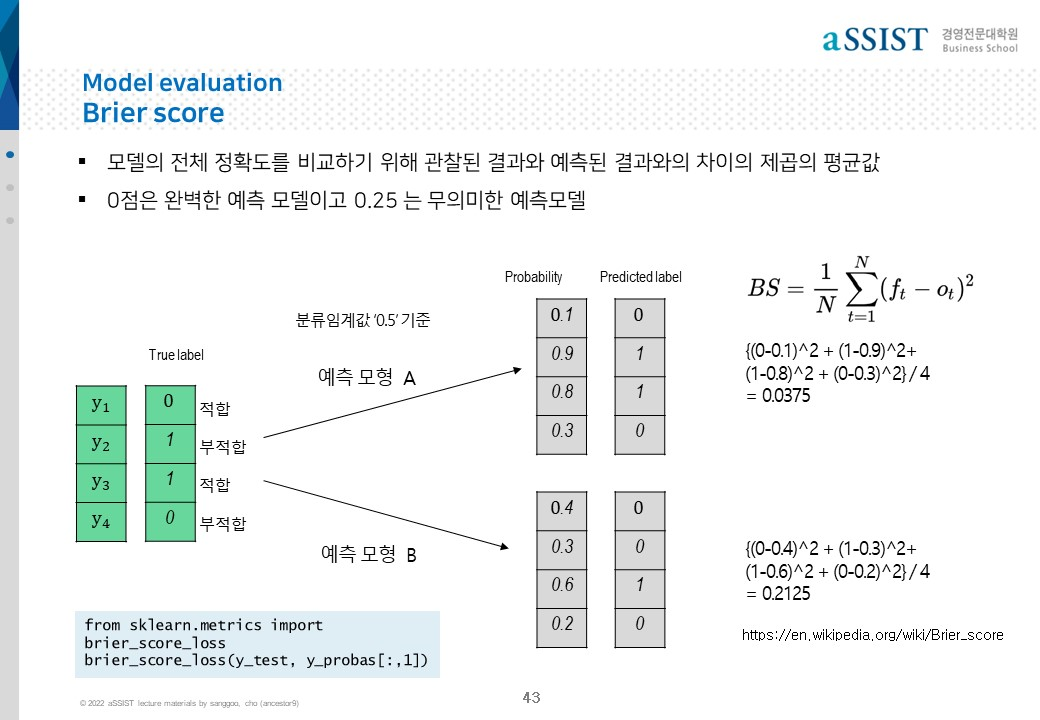

In [44]:
Image(filename=dir_path + '/슬라이드43.jpg', width=width, height=height)

In [46]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, y_probas[:, 1])

0.053935561184357717

### plot_lift_curve / plot_cumulative_gain
- lift: the ratio between the results obtained with and without the predictive model
- cumulative_gain: percentage of the overall number of cases in a given category "gained" by targeting a percentage of the total number of cases

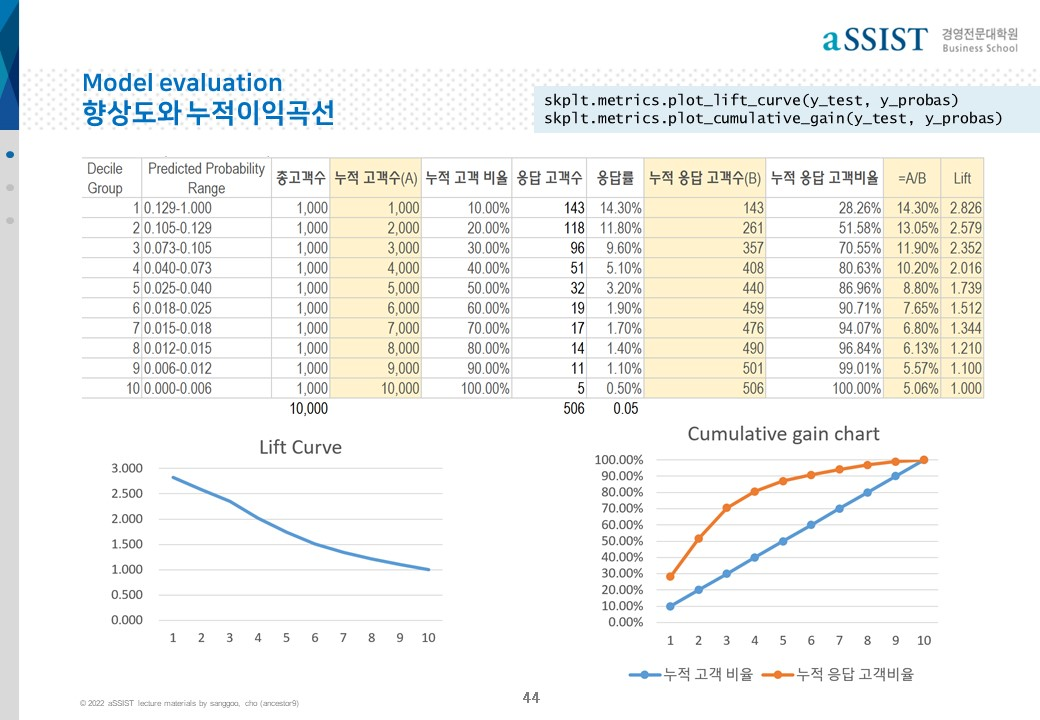

In [48]:
Image(filename=dir_path + '/슬라이드44.jpg', width=width, height=height)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

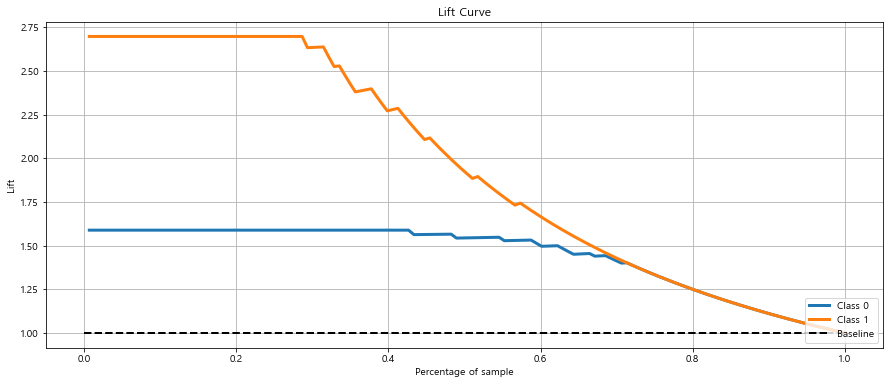

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

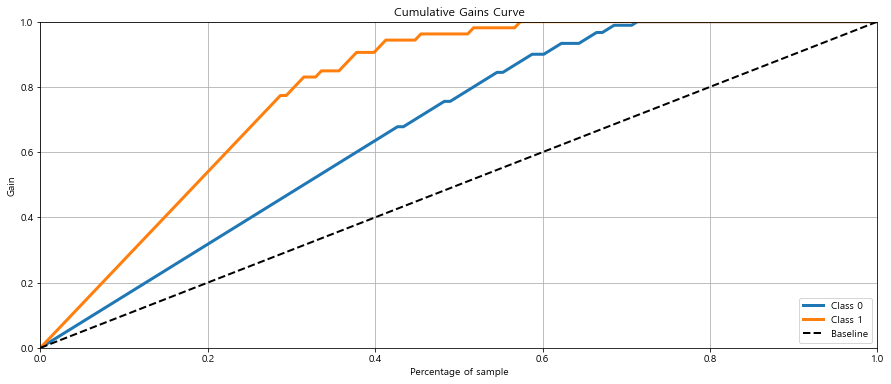

In [47]:
skplt.metrics.plot_lift_curve(y_test, y_probas); plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)

# End